### Análise de dados referentes a Unicórnios do ano de 2021
Unicórnios são empresas que atingiram altos valores, sendo startups

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
base = pd.read_csv(r'C:/Users/carol/Downloads/Startups+in+2021+end.csv')
base.head(3)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"


In [3]:
base.shape

(936, 8)

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [18]:
base.rename(columns={'Unnamed: 0': 'Id'},inplace=True)

In [19]:
base.isnull().sum()

Id                   0
Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                15
Industry             0
Select Investors     1
Month                0
Year                 0
dtype: int64

In [20]:
base.nunique()

Id                  936
Company             935
Valuation ($B)      192
Date Joined         589
Country              47
City                239
Industry             17
Select Investors    920
Month                12
Year                 13
dtype: int64

In [21]:
base.Industry.value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Industry, dtype: float64

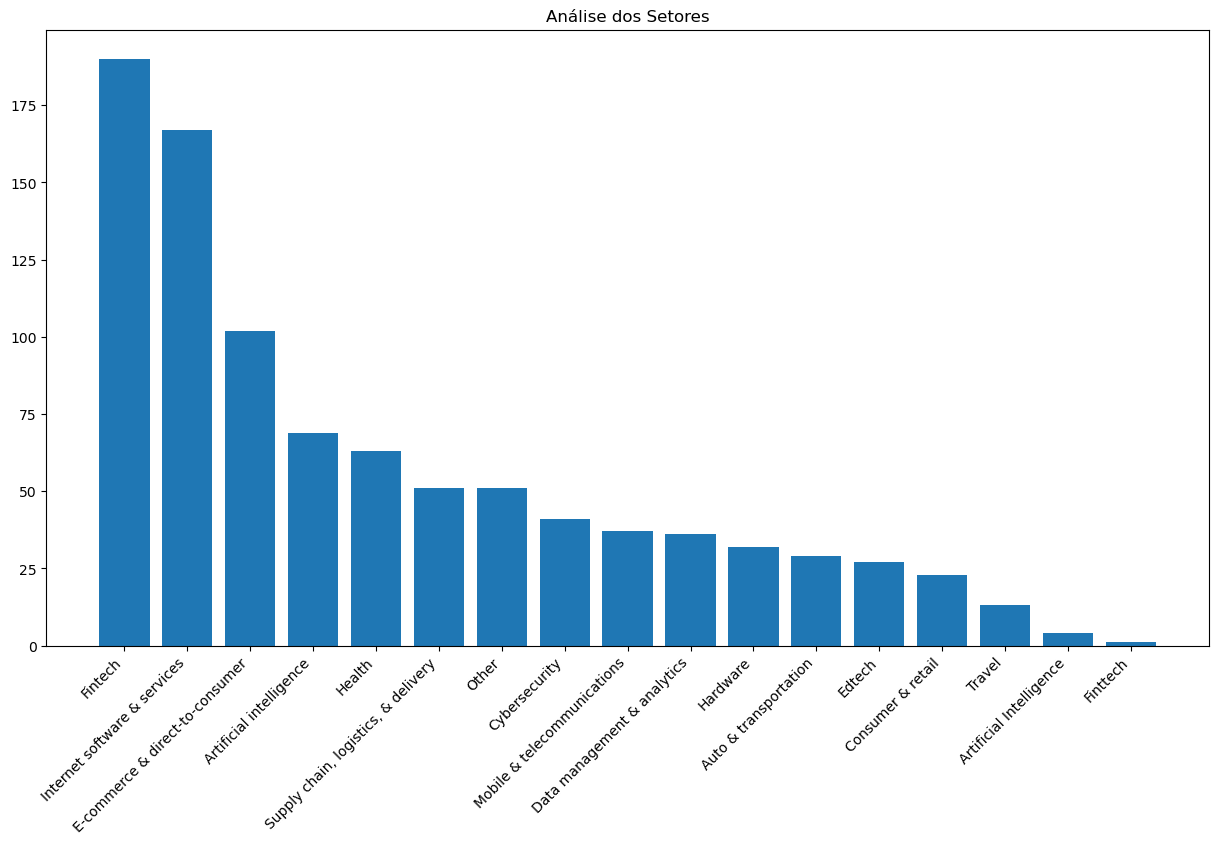

In [22]:
plt.figure(figsize=(15,8))
plt.title('Análise dos Setores')
plt.bar(base.Industry.value_counts().index,base.Industry.value_counts())
plt.xticks(rotation = 45, ha = 'right')
plt.show();

In [23]:
analise = round(base.Country.value_counts(normalize=True) *100, 1)
analise

United States           51.0
China                   18.1
India                    5.4
United Kingdom           4.0
Germany                  2.5
Israel                   2.2
France                   2.0
Canada                   1.6
Brazil                   1.6
South Korea              1.2
Singapore                1.2
Hong Kong                0.7
Japan                    0.6
Australia                0.6
Mexico                   0.5
Netherlands              0.5
Indonesia                0.4
Spain                    0.4
Sweden                   0.4
Switzerland              0.4
Ireland                  0.3
United Arab Emirates     0.3
Norway                   0.3
Belgium                  0.2
Thailand                 0.2
Denmark                  0.2
Philippines              0.2
Finland                  0.2
Colombia                 0.2
South Africa             0.2
Turkey                   0.2
Austria                  0.2
Chile                    0.1
Malaysia                 0.1
Czech Republic

In [24]:
analise = analise.head(10)

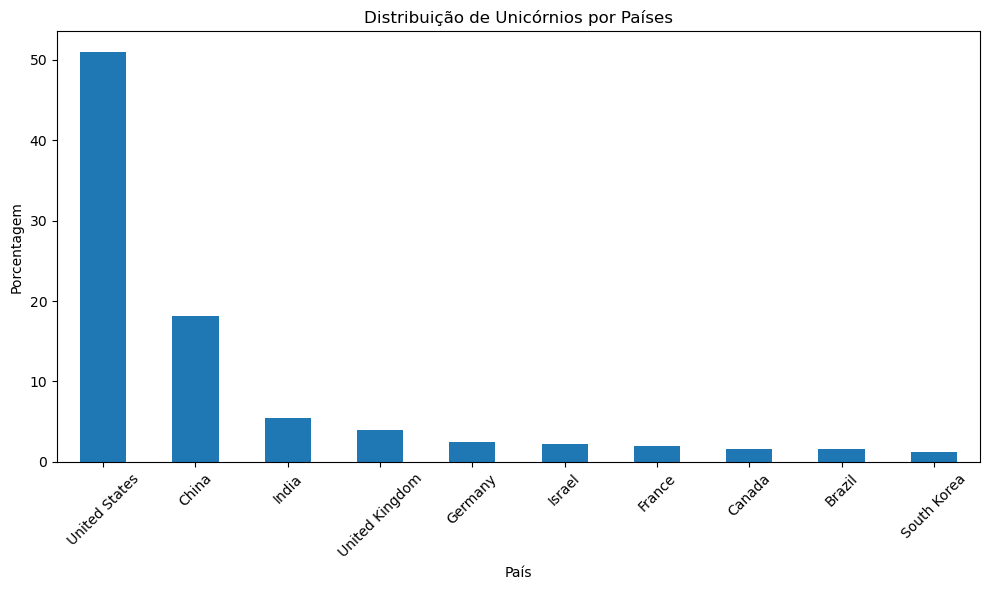

In [25]:
plt.figure(figsize=(10, 6))  
analise.plot(kind='bar')     
plt.xlabel('País')           
plt.ylabel('Porcentagem')              
plt.title('Distribuição de Unicórnios por Países')  
plt.xticks(rotation=45)      
plt.tight_layout()           

plt.show()

In [26]:
#convertendo para datetime
base['Date Joined'] = pd.to_datetime(base['Date Joined'])

base['Date Joined'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Date Joined, dtype: datetime64[ns]

In [27]:
base['Month'] = pd.DatetimeIndex(base['Date Joined']).month
base['Year'] = pd.DatetimeIndex(base['Date Joined']).year

In [28]:
base.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [33]:
analise_agrupada = base.groupby(by=['Country', 'Year', 'Month','Company']).count()['Id'].reset_index()
analise_agrupada

,Country,Year,Month,Company,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [34]:
analise_agrupada.loc[analise_agrupada['Country']=='Brazil']

,Country,Year,Month,Company,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [37]:
base['Valuation ($B)'] = pd.to_numeric(base['Valuation ($B)'].apply(lambda Linha: Linha.replace('$', '')))
base.head()                                     

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Month,Year
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [41]:
analise_pais = base.groupby(by=['Country']).sum()['Valuation ($B)'].reset_index()
analise_pais.head()

,Country,Valuation ($B)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60


In [42]:
analise_valor = analise_pais.sort_values('Valuation ($B)', ascending=False)
analise_valor.head()

,Country,Valuation ($B)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63


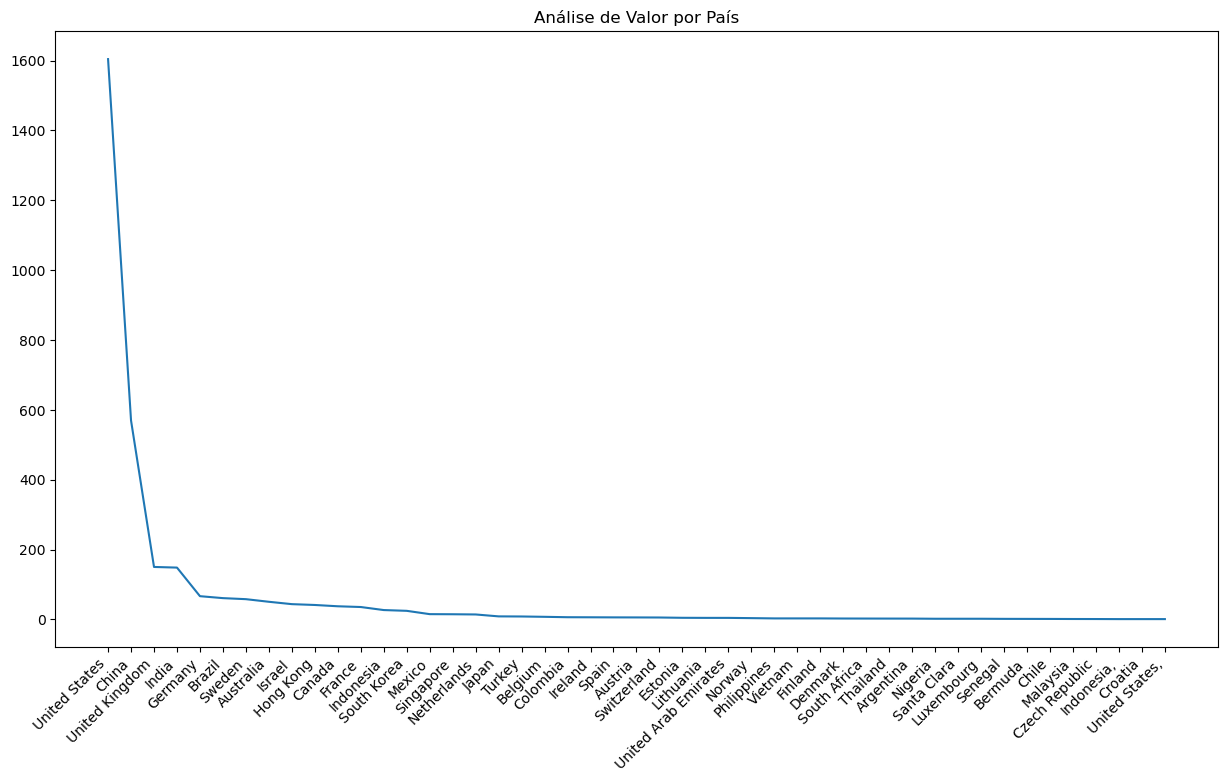

In [44]:
plt.figure(figsize=(15,8))
plt.plot(analise_valor['Country'], analise_valor['Valuation ($B)'])
plt.title('Análise de Valor por País')
plt.xticks(rotation=45, ha= 'right');